In [7]:
import os
import winsound

import librosa
import librosa.display
import IPython.display

import matplotlib.pyplot as plt
import numpy as np
import IPython.display as ipd
%matplotlib inline

In [2]:
# path 정보 확인
print(os.getcwd())

target_path = "d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300"
print(target_path)

d:\GH\Audio\DSP
d:\GH\Audio\dataset\소리인식\분류완료\Drager evita V300


In [47]:
filename = os.path.join(target_path, 'V300 high priority alarm 01.wav')
y, sr = librosa.load(filename, sr=44100)

print(y, sr)
print(y.shape, sr)

[-0.00772095 -0.006073   -0.00889587 ...  0.          0.
  0.        ] 44100
(189446,) 44100


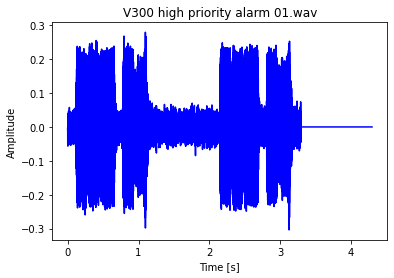

In [36]:
time = np.linspace(0, len(y)/sr, len(y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

In [37]:
def non_zero(data):
    idx = np.where(data != 0)[0]
    my_wants = idx[-1]
    return data[:(my_wants+1)]

In [38]:
None_zero_y = non_zero(y)
print(y.shape)
print(None_zero_y.shape)

(189446,)
(145346,)


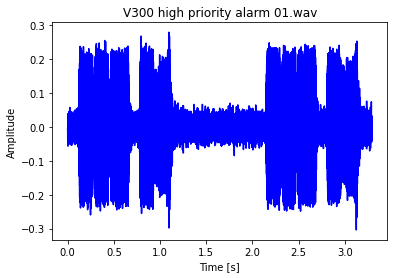

In [39]:
time = np.linspace(0, len(None_zero_y)/sr, len(None_zero_y)) # time axis

fig, ax1 = plt.subplots() # plot
ax1.plot(time, None_zero_y, color = 'b', label='speech waveform')
ax1.set_ylabel("Amplitude") # y 축
ax1.set_xlabel("Time [s]") # x 축
plt.title('V300 high priority alarm 01.wav') # 제목
plt.show()

In [40]:
n_fft = 2048
win_length = 2048
hop_length = 1024
n_mels = 128

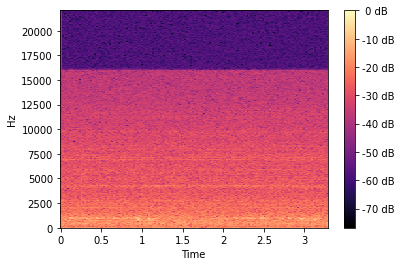

(1025, 142)


In [41]:
# Spectrogram
stft_result = librosa.stft(None_zero_y, n_fft=n_fft, win_length = win_length, hop_length=hop_length)
D = np.abs(stft_result)
S_dB = librosa.power_to_db(D, ref=np.max)
librosa.display.specshow(S_dB, sr=sr, hop_length = 1024, y_axis='linear', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

print(S_dB.shape)

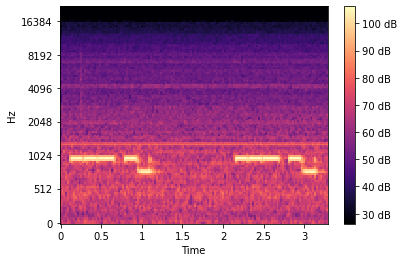

(128, 142)


In [42]:
# Mel-Spectrogram
mel_spec = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=n_mels, hop_length=hop_length, win_length=win_length)
librosa.display.specshow(librosa.amplitude_to_db(mel_spec, ref=0.00002), sr=sr, hop_length = hop_length, y_axis='mel', x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.show()

print(mel_spec.shape)

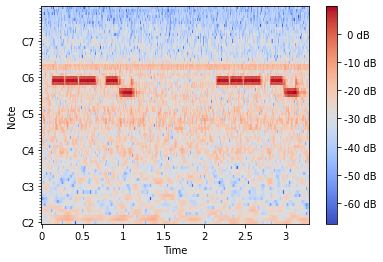

(72, 284)


In [43]:
# Unlike the Fourier transform, but similar to the mel scale, the constant-Q transform
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(None_zero_y, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))

librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%2.0f dB')
plt.show()

print(logC.shape)

(20, 284)


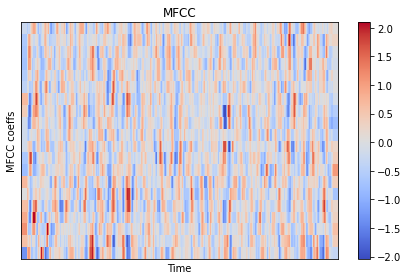

In [53]:
mfcc = librosa.feature.mfcc(y=None_zero_y, sr=sr, n_mfcc=20)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)
print(delta2_mfcc.shape)

# plt.figure(figsize=(12,4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()